#**AutoVIML**

+ **`Auto_ViML` a été conçu pour `créer des modèles interprétables hautes performances avec le moins de variables nécessaires`. Le « V » dans Auto_ViML signifie `Variant` car il essaie plusieurs modèles avec plusieurs fonctionnalités pour vous trouver le modèle le plus performant pour votre ensemble de données. Le « i » dans `Auto_ViML` signifie « interprétable » puisque `Auto_ViML` sélectionne le moins de fonctionnalités nécessaires pour créer un modèle plus simple et plus interprétable. Dans la plupart des cas, `Auto_ViML` crée des modèles avec 20 à 99 % de fonctionnalités en moins qu'un modèle aux performances similaires avec toutes les fonctionnalités incluses (ceci est basé sur mes essais. Votre expérience peut varier).**


+ `Auto_ViML` est l'outil d'accélération de modèles de chaque Data Scientist qui :

  + **Vous aide avec le `nettoyage des données` : vous pouvez envoyer l'intégralité de votre dataframe telle quelle et Auto_ViML suggérera des modifications pour vous aider avec les valeurs manquantes, le formatage des variables, l'ajout de variables, etc. Il adore les données sales. Plus c’est sale, mieux c’est !**


  + **Effectue la `sélection des fonctionnalités` : Auto_ViML sélectionne automatiquement les variables par défaut. Ceci est très utile lorsque vous avez des centaines, voire des milliers de variables, car cela permet d'identifier facilement lesquelles d'entre elles sont importantes et lesquelles sont inutiles. Vous pouvez également désactiver cette option (voir API).**


  + **`Supprime automatiquement les fonctionnalités hautement corrélées`. Si deux variables sont fortement corrélées dans votre ensemble de données, laquelle devez-vous supprimer et laquelle devez-vous conserver ? La décision n’est pas aussi facile qu’il y paraît. Auto_ViML utilise l'algorithme `SULOV` pour supprimer les fonctionnalités hautement corrélées.**


  + **`Génère graphiquement des résultats de performances`. Définissez simplement verbose = 1 (ou) 2 au lieu de 0 (silencieux). Vous obtiendrez des informations de meilleure qualité à mesure que vous augmenterez la verbosité.
Gère le texte, la date-heure, les structures (listes, dictionnaires), les variables numériques, booléennes, factorielles et catégorielles, le tout dans un seul modèle en utilisant un seul processus direct.**

+ Auto_ViML est construit à l'aide de scikit-learn, numpy, pandas et matplotlib. Il devrait fonctionner sur la plupart des installations Python 3 Anaconda. Vous n'aurez pas à importer de bibliothèques spéciales autres que les bibliothèques "XGBoost", "Imbalanced-Learn", "CatBoost" et "featuretools". Nous utilisons la bibliothèque "SHAP" pour l'interprétabilité.

+ Mais si vous ne disposez pas de ces bibliothèques, Auto_ViML les installera automatiquement pour vous.

In [ ]:
#!pip install autoviml --upgrade --ignore-installed
# !pip install git+https://github.com/AutoViML/Auto_ViML.git
!pip install autoviml --user

```
cd <AutoVIML_Destination>
git clone git@github.com:AutoViML/Auto_ViML.git
# or download and unzip https://github.com/AutoViML/Auto_ViML/archive/master.zip
conda create -n <your_env_name> python=3.7 anaconda
conda activate <your_env_name> # ON WINDOWS: `source activate <your_env_name>`
cd Auto_ViML
pip install -r requirements.txt
```

In [ ]:
# Step 1: Download and unzip Auto_ViML repository
# You can use the following command to download and unzip the repository:
# Alternatively, you can manually download the zip file from https://github.com/AutoViML/Auto_ViML/archive/master.zip and extract it.
!curl -LOk https://github.com/AutoViML/Auto_ViML/archive/master.zip
!unzip master.zip
!rm master.zip  # Remove the zip file if you don't need it

In [ ]:
import pandas as pd
####   THIS SHOULD print Version Number. If it doesn't, it means you don't have latest version ##
### If you want to see the sitepackages version use this
from autoviml.Auto_ViML import Auto_ViML

In [ ]:
Auto_ViML.__version__

In [ ]:
datapath = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'

In [ ]:
df = pd.read_csv(datapath+'titanic.csv')
#test = train[-15:]
#test = pd.read_csv(datapath+'test.csv')
print(train.shape)
#print(test.shape)
print(train.head)

In [ ]:
num = int(0.9*df.shape[0])
train = df[:num]
test = df[num:]
target = 'Survived'
sample_submission=''
scoring_parameter = 'balanced-accuracy'

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,
                                    Imbalanced_Flag=False,
                                    verbose=1)

In [ ]:
def reverse_dict(map_dict):
    return dict([(v,k) for (k,v) in map_dict.items()])

Imported Auto_ViML version: 0.1.704. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
# Use this to Test Classification Problems Only ####
ret_dict = {0: 0, 1: 1}
map_dict = reverse_dict(ret_dict)
m_thresh = 0.21
modelname='XGBoost'
#####################################################################

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 21)
    Training Set Memory Usage = 0.79 MB
Test Set Shape = (2113, 21)
    Test Set Memory Usage = 0.34 MB
Single_Label Target: ['Churn']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          No:    3641  ->   73.9%
         Yes:    1289  ->   26.1%
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of 

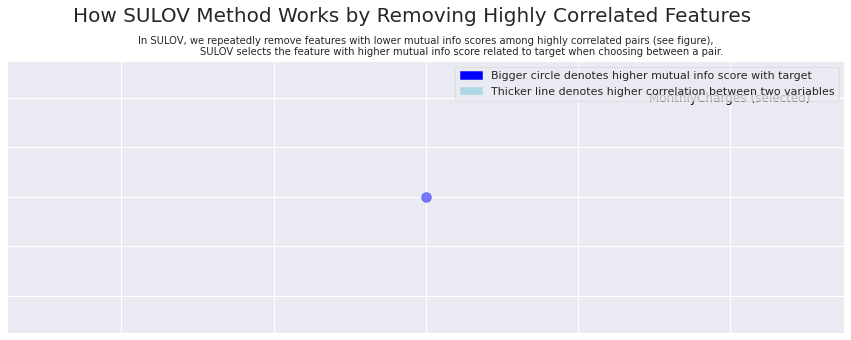

Splitting selected features into float and categorical (integer) variables:
    (1) float variables ...
    (18) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 19 
    Finding Important Features using Boosted Trees algorithm...
        using 19 variables...
        using 15 variables...
        using 11 variables...
        using 7 variables...
        using 3 variables...
Found 13 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  3944 , CV rows =  986
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling o

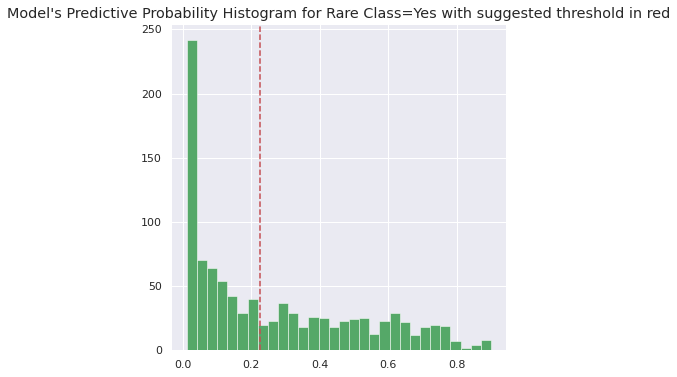

    Using threshold=0.5. However, 0.226 provides better F1=0.65 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 75.1%
Balanced Accuracy = 72.71% with Threshold = 0.50
Confusion Matrix:
[[658  70]
 [116 142]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       728
           1       0.67      0.55      0.60       258

    accuracy                           0.81       986
   macro avg       0.76      0.73      0.74       986
weighted avg       0.80      0.81      0.81       986

Balanced Accuracy = 79.04% with Threshold = 0.23
Confusion Matrix:
[[516 212]
 [ 33 225]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       728
           1       0.51      0.87      0.65       258

    accuracy                           0.75       986
   macro avg       0.73      0.79      0.73

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 76.9%
    Balanced Accuracy = 76.7%
    Precision         = 54.1%
    Average Precision = 72.2%
    Recall            = 76.4%
    F1 Score          = 63.3%
#####################################################
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       728
           1       0.54      0.76      0.63       258

    accuracy                           0.77       986
   macro avg       0.72      0.77      0.73       986
weighted avg       0.81      0.77      0.78       986

[[561 167]
 [ 61 197]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


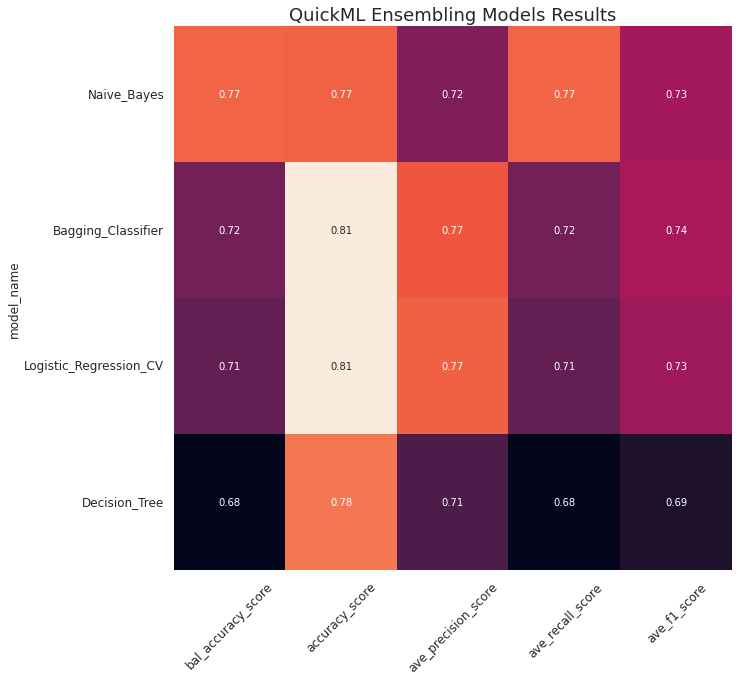

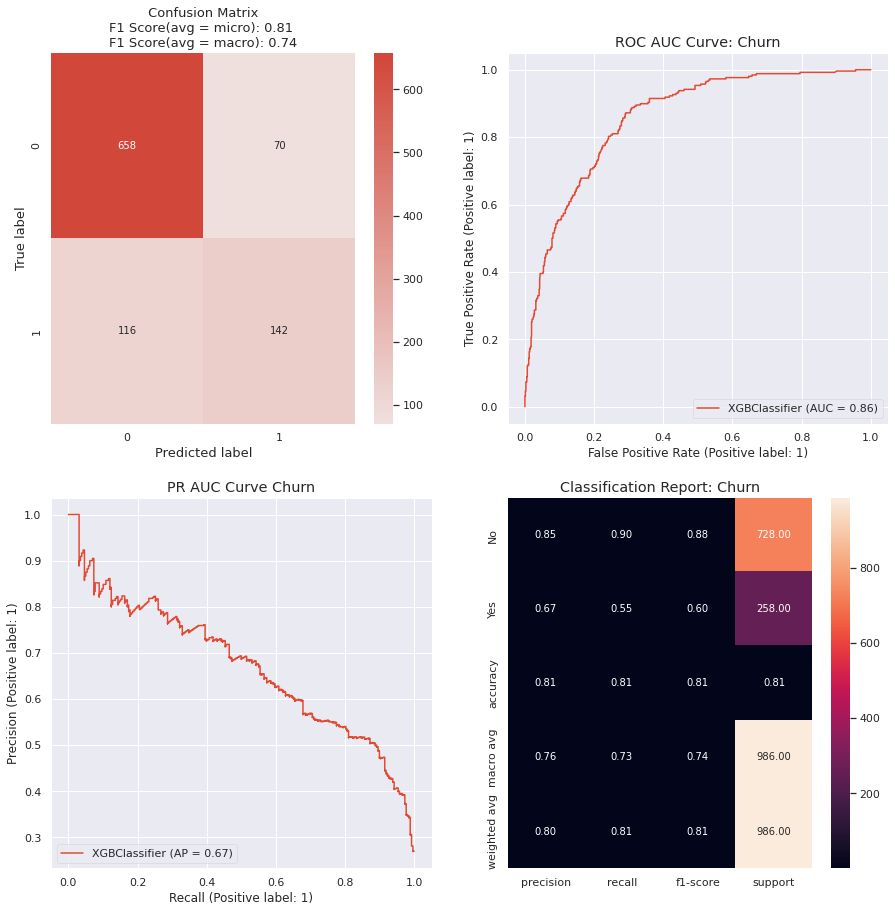

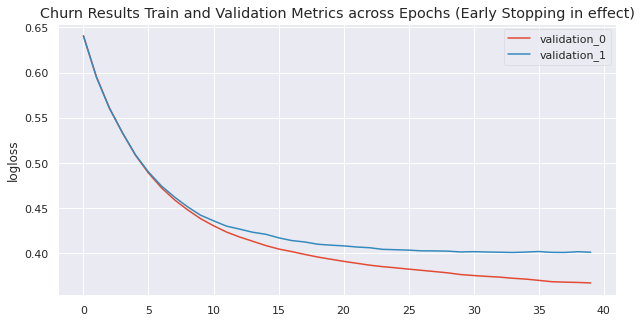

    Time taken for this Target (in seconds) = 223
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 7
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.226
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 234
Writing Output files to disk...
    Saving p

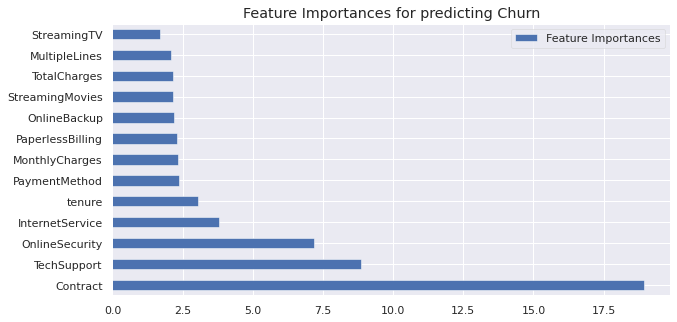

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Normal Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values)))
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print('Modified Threshold Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values)))
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
except:
    print('No target variable present in test data. No results')